In [2]:
# imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from scipy.stats import mode
from sklearn.metrics import confusion_matrix


In [3]:
# Készíts egy függvényt ami betölti a digits datasetet 
# NOTE: használd az sklearn load_digits-et
# Függvény neve: load_digits()
# Függvény visszatérési értéke: a load_digits visszatérési értéke
def load_dataset():
    digits = load_digits()
    return digits
digits = load_dataset()


In [4]:

def sklearn_to_df(sklearn_dataset):
    df = pd.DataFrame(sklearn_dataset.data, columns=sklearn_dataset.feature_names)
    df['target'] = pd.Series(sklearn_dataset.target)
    return df
df = sklearn_to_df(digits)
print(df.head(3))
print(df["target"])

   pixel_0_0  pixel_0_1  pixel_0_2  pixel_0_3  pixel_0_4  pixel_0_5  \
0        0.0        0.0        5.0       13.0        9.0        1.0   
1        0.0        0.0        0.0       12.0       13.0        5.0   
2        0.0        0.0        0.0        4.0       15.0       12.0   

   pixel_0_6  pixel_0_7  pixel_1_0  pixel_1_1  ...  pixel_6_7  pixel_7_0  \
0        0.0        0.0        0.0        0.0  ...        0.0        0.0   
1        0.0        0.0        0.0        0.0  ...        0.0        0.0   
2        0.0        0.0        0.0        0.0  ...        0.0        0.0   

   pixel_7_1  pixel_7_2  pixel_7_3  pixel_7_4  pixel_7_5  pixel_7_6  \
0        0.0        6.0       13.0       10.0        0.0        0.0   
1        0.0        0.0       11.0       16.0       10.0        0.0   
2        0.0        0.0        3.0       11.0       16.0        9.0   

   pixel_7_7  target  
0        0.0       0  
1        0.0       1  
2        0.0       2  

[3 rows x 65 columns]
0       0


In [5]:
# Vizsgáld meg a betöltött adatszetet (milyen elemek vannak benne stb.)

print(dir(digits))
print(digits.target_names)
digits.target.shape

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']
[0 1 2 3 4 5 6 7 8 9]


(1797,)

In [6]:

print(df.isnull().sum())

pixel_0_0    0
pixel_0_1    0
pixel_0_2    0
pixel_0_3    0
pixel_0_4    0
            ..
pixel_7_4    0
pixel_7_5    0
pixel_7_6    0
pixel_7_7    0
target       0
Length: 65, dtype: int64


In [7]:
print(df.describe())

       pixel_0_0    pixel_0_1    pixel_0_2    pixel_0_3    pixel_0_4  \
count     1797.0  1797.000000  1797.000000  1797.000000  1797.000000   
mean         0.0     0.303840     5.204786    11.835838    11.848080   
std          0.0     0.907192     4.754826     4.248842     4.287388   
min          0.0     0.000000     0.000000     0.000000     0.000000   
25%          0.0     0.000000     1.000000    10.000000    10.000000   
50%          0.0     0.000000     4.000000    13.000000    13.000000   
75%          0.0     0.000000     9.000000    15.000000    15.000000   
max          0.0     8.000000    16.000000    16.000000    16.000000   

         pixel_0_5    pixel_0_6    pixel_0_7    pixel_1_0    pixel_1_1  ...  \
count  1797.000000  1797.000000  1797.000000  1797.000000  1797.000000  ...   
mean      5.781859     1.362270     0.129661     0.005565     1.993879  ...   
std       5.666418     3.325775     1.037383     0.094222     3.196160  ...   
min       0.000000     0.000000    

In [8]:
# Vizsgáld meg a data paraméterét a digits dataset-nek (tartalom,shape...)
print(digits.feature_names)

['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']


In [15]:
# Készíts egy függvényt ami létrehoz egy KMeans model-t 10 db cluster-el
# NOTE: használd az sklearn Kmeans model-jét (random_state legyen 0)
# Miután megvan a model predict-elj vele 
# NOTE: használd a fit_predict-et
# Függvény neve: predict(n_clusters:int,random_state:int,digits)
# Függvény visszatérési értéke: (model:sklearn.cluster.KMeans,clusters:np.ndarray)
def predict(n_clusters:int, random_state:int) -> tuple:
        
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
    clusters = kmeans.fit_predict(digits.data)
    
    return kmeans, clusters
kmeans, clusters = predict(10,0)
#print(kmeans)
for cluster in clusters:
    print(cluster)



5
7
7
1
0
3
9
4
3
3
5
6
8
1
0
2
9
4
7
3
5
6
8
1
6
2
9
4
7
3
5
3
2
2
9
2
5
3
7
3
7
0
6
4
4
1
2
6
5
5
7
7
4
7
4
5
6
7
9
1
1
4
1
1
0
9
9
9
0
7
6
2
5
3
2
6
7
6
5
5
6
4
9
1
8
6
4
0
9
1
6
1
1
7
4
7
7
0
1
7
0
5
2
4
9
3
9
6
4
2
0
0
4
8
7
7
7
2
4
3
2
0
7
7
0
3
5
7
3
7
5
6
8
1
0
2
9
4
7
3
5
6
8
1
0
2
9
4
7
3
5
6
8
1
0
2
9
4
7
3
5
1
2
2
9
2
5
3
7
3
7
0
6
4
4
1
2
6
5
5
8
8
4
7
8
5
6
8
9
1
1
4
1
1
0
9
9
9
7
3
6
2
5
3
2
8
7
8
5
5
6
4
9
1
8
6
4
1
6
1
3
6
4
9
7
0
1
6
0
5
2
4
9
3
9
6
4
2
7
0
4
8
7
8
8
2
2
6
7
7
0
3
5
7
3
7
5
7
8
1
0
3
9
4
3
2
5
7
8
1
0
2
9
4
7
4
5
7
8
1
0
2
9
4
7
3
5
3
2
3
9
3
5
3
7
3
7
0
7
4
4
1
2
7
5
5
8
8
4
3
8
5
6
8
9
1
1
4
1
1
0
9
9
9
0
4
7
2
5
4
2
8
3
8
5
5
7
4
9
1
8
7
4
0
9
1
7
1
4
7
4
9
7
0
1
7
0
5
3
1
9
4
9
7
4
2
0
0
4
8
3
8
8
3
4
6
2
0
3
3
0
6
5
7
4
1
5
6
8
1
0
2
9
4
3
3
5
6
8
1
0
2
9
4
7
3
5
6
8
1
0
2
9
4
3
3
5
3
3
2
9
3
5
3
3
3
3
0
6
4
4
1
2
6
5
5
8
8
4
3
8
5
8
8
9
1
3
4
3
3
0
9
9
9
0
3
6
3
5
3
2
8
7
8
5
5
6
4
9
1
8
6
4
6
9
1
6
1
3
6
4
9
3
0
1
6
0
5
2
1
9
3
7
6
4
2
6
0
4
8


e:\OE\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [10]:
# Vizsgáld meg a shape-jét a kapott model cluster_centers_ paraméterének.

kmeans.cluster_centers_.shape


(10, 64)

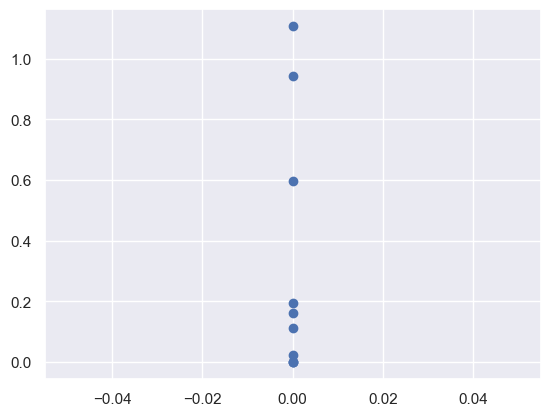

In [11]:
# Készíts egy plotot ami a cluster középpontokat megjeleníti
#plt.scatter(X[:,0], X[:,1])

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1])
plt.show()


In [19]:
# Készíts egy függvényt ami visszaadja a predictált cluster osztályokat
# NOTE: amit a predict-ből visszakaptunk "clusters" azok lesznek a predictált cluster osztályok
# HELP: amit a model predictált cluster osztályok még nem a labelek, hanem csak random cluster osztályok, 
#       Hogy label legyen belőlük:
#       1. készíts egy result array-t ami ugyan annyi elemű mint a predictált cluster array
#       2. menj végig mindegyik cluster osztályon (0,1....9)
#       3. készíts egy maszkot ami az adott cluster osztályba tartozó elemeket adja vissza
#       4. a digits.target-jét indexeld meg ezzel a maszkkal
#       5. számold ki ennel a subarray-nek a móduszát
#       6. a result array-ben tedd egyenlővé a módusszal azokat az indexeket ahol a maszk True 
#       Erre azért van szükség mert semmi nem biztosítja nekünk azt, hogy a "0" cluster a "0" label lesz, lehet, hogy az "5" label lenne az.

# Függvény neve: get_labels(clusters:np.ndarray, digits)
# Függvény visszatérési értéke: labels:np.ndarray

def get_labels(clusters:np.ndarray, digits):
    result_array = np.ndarray(shape = len(clusters))
    # a cluster osztályok száma
    amount_of_clusters = len(np.unique(clusters))

    for cluster in range(amount_of_clusters):
        mask = clusters == cluster
        # https://www.geeksforgeeks.org/numpy-bincount-python/
        # A bincount függvénnyel meghatározzuk az elemekhez tartozó label-ek előfordulási gyakoriságát, 
        #   majd a argmax függvénnyel kiválasztjuk a leggyakoribb label-t
        label = np.bincount(digits.target[mask]).argmax()
        result_array[mask] = label
    return result_array
get_labels(clusters, digits)


array([0., 8., 8., ..., 8., 9., 9.])

In [23]:
# Készíts egy függvényt ami kiszámolja a model accuracy-jét
# Függvény neve: calc_accuracy(target_labels:np.ndarray,predicted_labels:np.ndarray)
# Függvény visszatérési értéke: accuracy:float
# NOTE: Kerekítsd 2 tizedes jegyre az accuracy-t

def calc_accuracy(target_labels: np.ndarray,predicted_labels: np.ndarray) -> float:
    accuracy_sc = accuracy_score(target_labels, predicted_labels)
    accuracy = round(accuracy_sc,2)
    return accuracy
target_labels = digits.target
predicted_labels = get_labels(clusters, digits)
calc_accuracy(target_labels, predicted_labels)

0.79

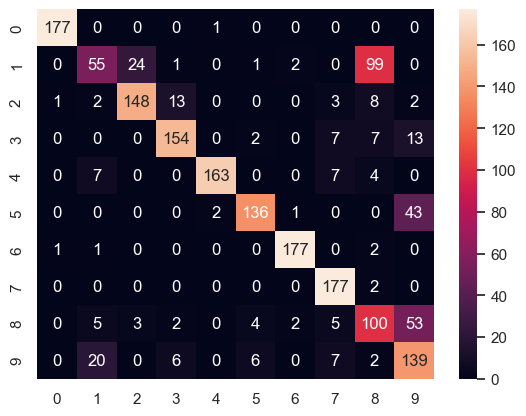

In [25]:
# Készíts egy confusion mátrixot és plot-old seaborn segítségével
def plot():
    c_matrix = confusion_matrix(target_labels, predicted_labels)
    sns.heatmap(c_matrix, annot=True, fmt='d')
plot()